Importing Important libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the file and obtaining the info

In [46]:
data=pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104409 entries, 0 to 104408
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       104409 non-null  int64  
 1   month      104409 non-null  int64  
 2   day        104409 non-null  int64  
 3   latitude   104409 non-null  float64
 4   longitude  104409 non-null  float64
 5   zon.winds  89839 non-null   float64
 6   mer.winds  89839 non-null   float64
 7   humidity   65615 non-null   float64
 8   air temp.  96571 non-null   float64
 9   s.s.temp.  104409 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 8.0 MB


Calculating Correlation between all variables present in the dataset

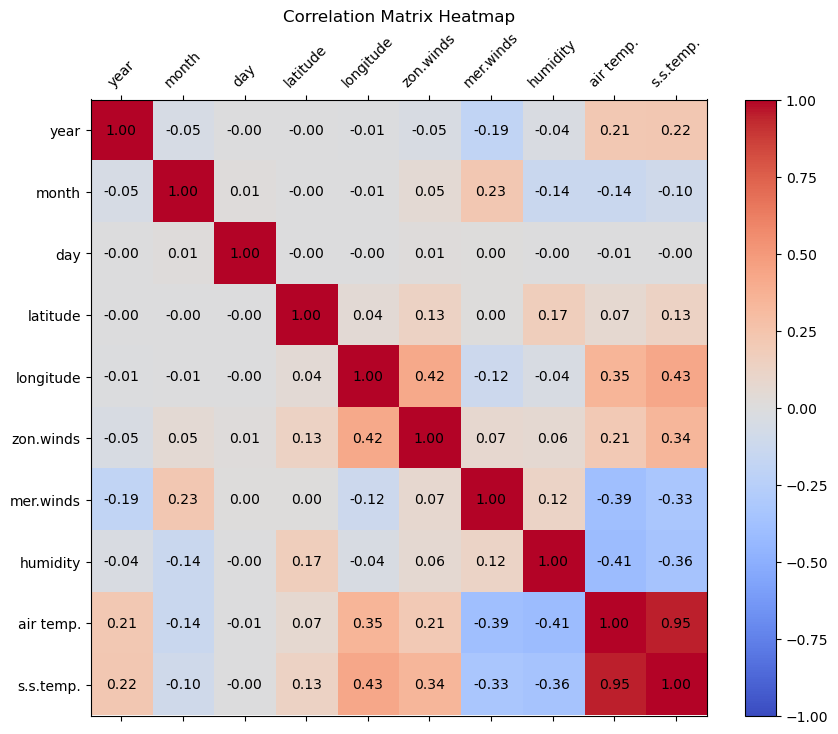

In [47]:

corr=data.corr()

# Create a heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

# Set axis labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# Set title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

Creating date column and sorting it for better analysis

In [48]:


# Create a new datetime column
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Sort the DataFrame by the new datetime column
data_sorted = data.sort_values(by='date')

# Save the sorted DataFrame to a new file
data_sorted.to_csv('sorted_data.csv', index=False)

# Verify the sorting
print(data_sorted.head())


       year  month  day  latitude  longitude  zon.winds  mer.winds  humidity  \
31504  1980      3    8     -0.02    -109.44       -4.9        1.1       NaN   
91306  1980      3    9     -0.02    -109.44       -4.5        2.2       NaN   
1058   1980      3   10     -0.02    -109.44       -3.8        1.9       NaN   
85273  1980      3   12     -0.02    -109.44       -4.4        0.3       NaN   
37210  1980      3   13     -0.02    -109.44       -3.2        0.1       NaN   

       air temp.  s.s.temp.       date  
31504      25.66      25.97 1980-03-08  
91306      25.69      25.28 1980-03-09  
1058       25.56      24.31 1980-03-10  
85273      24.72      23.64 1980-03-12  
37210      24.66      24.34 1980-03-13  


Reading the dataset on which we have to test our model

In [49]:
testdata1=pd.read_csv("evaluation.csv")
testdata2=pd.read_csv("data_1997_1998.csv")

Creating date column and sorting the test data for better analysis

In [50]:


# Create a new datetime column
testdata1['date'] = pd.to_datetime(testdata1[['year', 'month', 'day']])

# Sort the DataFrame by the new datetime column
testdata1_sorted = testdata1.sort_values(by='date')

# Save the sorted DataFrame to a new file
testdata1_sorted.to_csv('sorted_testdata1.csv', index=False)

# Verify the sorting
print(testdata1_sorted.head())


       Unnamed: 0  year  month  day  latitude  longitude  zon.winds  \
4951         4951  1980      3    7     -0.02    -109.44       -6.8   
16738       16738  1980      3   11     -0.02    -109.44       -4.2   
10752       10752  1980      8   27      0.00    -109.56       -3.8   
5289         5289  1980      8   29      0.00    -109.56       -5.0   
2392         2392  1980      8   31      0.00    -109.56       -6.2   

       mer.winds  humidity  air temp.       date  
4951         0.7       NaN      26.14 1980-03-07  
16738        1.5       NaN      25.30 1980-03-11  
10752        3.7       NaN      22.36 1980-08-27  
5289         2.4       NaN      22.45 1980-08-29  
2392         5.1       NaN      23.12 1980-08-31  


In [51]:


# Create a new datetime column
testdata2['date'] = pd.to_datetime(testdata2[['year', 'month', 'day']])

# Sort the DataFrame by the new datetime column
testdata2_sorted = testdata2.sort_values(by='date')

# Save the sorted DataFrame to a new file
testdata2_sorted.to_csv('sorted_testdata2.csv', index=False)

# Verify the sorting
print(testdata2_sorted.head())


       Index  year  month  day  latitude  longitude  zon.winds  mer.winds  \
0          0  1997      1    1      0.07    -110.00       -3.1        1.4   
14389  14389  1997      1    1      5.04    -109.94        NaN        NaN   
14802  14802  1997      1    1      5.12    -124.90       -1.4        1.7   
15338  15338  1997      1    1      4.91    -139.90       -6.5        3.4   
15838  15838  1997      1    1      4.95     147.00        NaN        NaN   

       humidity  air temp.       date  
0          89.6      22.66 1997-01-01  
14389      86.4      25.05 1997-01-01  
14802       NaN      24.19 1997-01-01  
15338      80.5      26.20 1997-01-01  
15838      75.9      28.64 1997-01-01  


Plotting the variables with good relation with target variable with respect to time for analysis

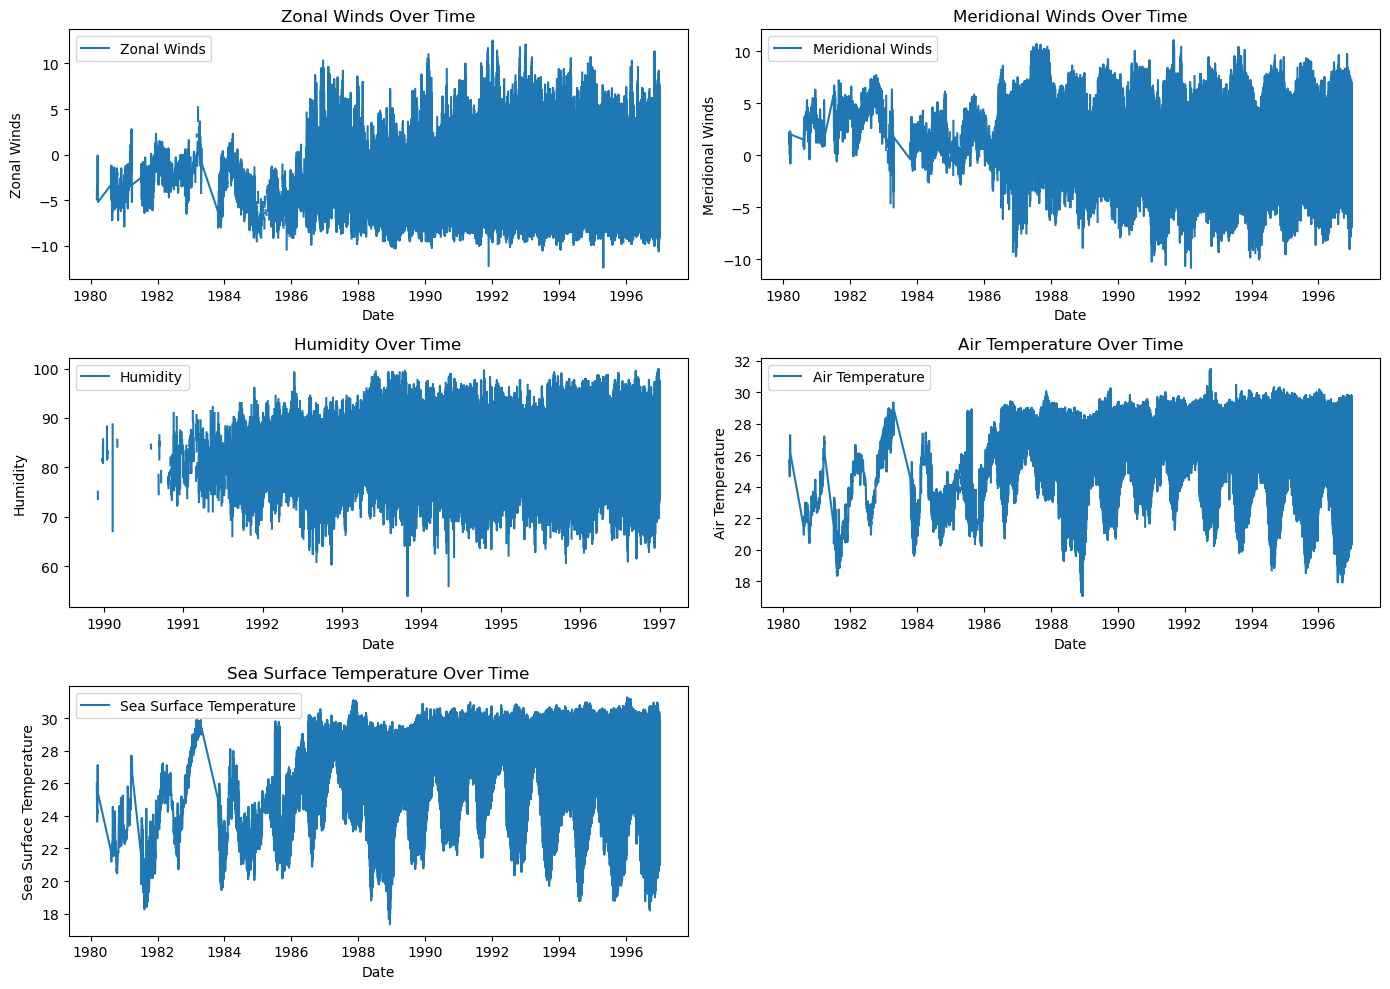

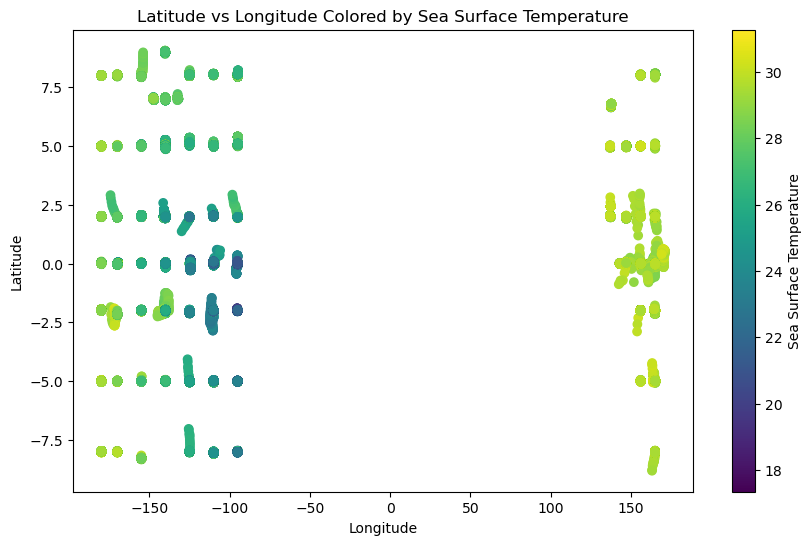

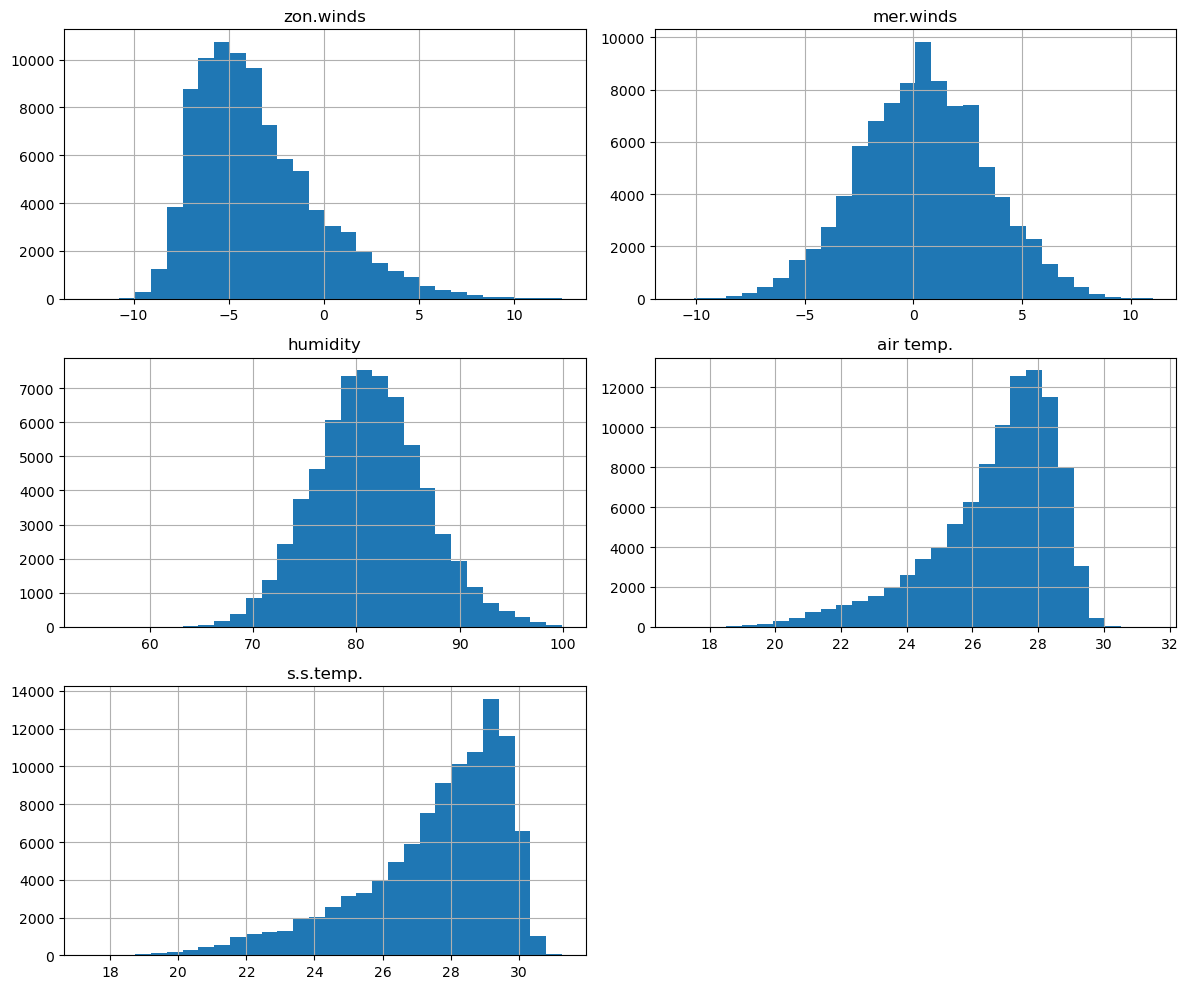

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your processed data
df = data_sorted

# Create time series plots
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(df['date'], df['zon.winds'], label='Zonal Winds')
plt.xlabel('Date')
plt.ylabel('Zonal Winds')
plt.title('Zonal Winds Over Time')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(df['date'], df['mer.winds'], label='Meridional Winds')
plt.xlabel('Date')
plt.ylabel('Meridional Winds')
plt.title('Meridional Winds Over Time')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(df['date'], df['humidity'], label='Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity Over Time')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(df['date'], df['air temp.'], label='Air Temperature')
plt.xlabel('Date')
plt.ylabel('Air Temperature')
plt.title('Air Temperature Over Time')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(df['date'], df['s.s.temp.'], label='Sea Surface Temperature')
plt.xlabel('Date')
plt.ylabel('Sea Surface Temperature')
plt.title('Sea Surface Temperature Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Create scatter plot for latitude vs longitude colored by sea surface temperature
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['s.s.temp.'], cmap='viridis')
plt.colorbar(scatter, label='Sea Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude Colored by Sea Surface Temperature')
plt.show()

# Create histograms for each variable
variables = ['zon.winds', 'mer.winds', 'humidity', 'air temp.', 's.s.temp.']
df[variables].hist(bins=30, figsize=(12, 10), layout=(3, 2))
plt.tight_layout()
plt.show()


In [53]:
data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104409 entries, 31504 to 101423
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   year       104409 non-null  int64         
 1   month      104409 non-null  int64         
 2   day        104409 non-null  int64         
 3   latitude   104409 non-null  float64       
 4   longitude  104409 non-null  float64       
 5   zon.winds  89839 non-null   float64       
 6   mer.winds  89839 non-null   float64       
 7   humidity   65615 non-null   float64       
 8   air temp.  96571 non-null   float64       
 9   s.s.temp.  104409 non-null  float64       
 10  date       104409 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 9.6 MB


Ploting sea surface temperature with respect to time to observe the trend

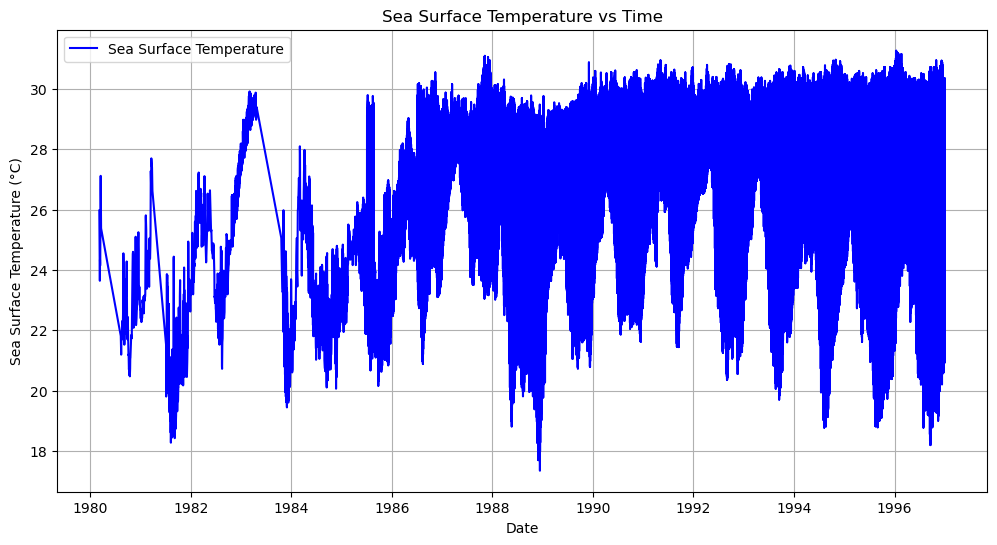

In [54]:

import pandas as pd
import matplotlib.pyplot as plt
df=data_sorted
df['date'] = pd.to_datetime(df['date'])

# Plotting sea surface temperature (s.s.temp.) vs time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['s.s.temp.'], label='Sea Surface Temperature', color='b')
plt.xlabel('Date')
plt.ylabel('Sea Surface Temperature (°C)')
plt.title('Sea Surface Temperature vs Time')
plt.legend()
plt.grid(True)
plt.show()


Plotting average sea surface temperature with respect to time

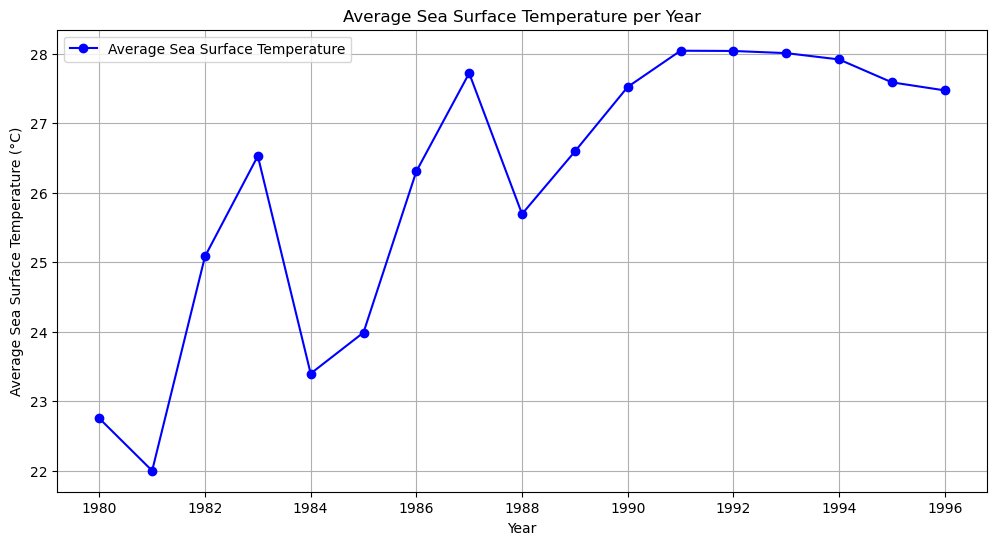

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

# Extract the year from the date column
df['year'] = df['date'].dt.year

# Group by year and calculate the mean sea surface temperature
avg_ss_temp_per_year = df.groupby('year')['s.s.temp.'].mean()

# Plotting average sea surface temperature per year
plt.figure(figsize=(12, 6))
avg_ss_temp_per_year.plot(kind='line', marker='o', color='b', label='Average Sea Surface Temperature')
plt.xlabel('Year')
plt.ylabel('Average Sea Surface Temperature (°C)')
plt.title('Average Sea Surface Temperature per Year')
plt.legend()
plt.grid(True)
plt.show()


Filling the null data using interpolation and mean

In [56]:
"""import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 0
end_index = 129
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 130
end_index = 388
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 389
end_index =734 
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 735
end_index = 1014
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 1015
end_index = 1569
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 1570
end_index = 2525
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 2526
end_index = 4360
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 4361
end_index = 6911
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 6912
end_index = 10839
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 10840
end_index = 15947
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 15948
end_index = 20650
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 20651
end_index = 26902
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 26903
end_index = 38964
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 38965
end_index = 54205
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 54206
end_index = 70788
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 70789
end_index = 87491
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('sorted_data.csv')

# Step 2: Select the subset of rows you want to sort
start_index = 87492
end_index = 104408
subset_df = df.iloc[start_index:end_index + 1]

# Step 3: Sort the selected subset by the 'age' column
sorted_subset_df = subset_df.sort_values(by='month')

# Step 4: Replace the original rows with the sorted subset in the DataFrame
df.iloc[start_index:end_index + 1] = sorted_subset_df

# Step 5: Save the DataFrame back to a CSV file
df.to_csv('sorted_data.csv', index=False)

print("Subset of data sorted by column 'month' and saved to sorted_data.csv")
import pandas as pd
import numpy as np


# Function to perform mean imputation for a specified column
def mean_imputation(df, column):
    mean_value = df[column].mean()
    df[column] = df[column].fillna(mean_value)
    return df

df = mean_imputation(df, 'zon.winds')

df = mean_imputation(df, 'mer.winds')

df = mean_imputation(df, 'air temp.')


# Optionally, save the DataFrame back to a CSV file
output_file_path = 'sorted_mean.csv'
df.to_csv(output_file_path, index=False)

print(f"\nDataFrame with mean imputed columns saved to {output_file_path}")
"""

'import pandas as pd\n\n# Step 1: Read the CSV file into a DataFrame\ndf = pd.read_csv(\'sorted_data.csv\')\n\n# Step 2: Select the subset of rows you want to sort\nstart_index = 0\nend_index = 129\nsubset_df = df.iloc[start_index:end_index + 1]\n\n# Step 3: Sort the selected subset by the \'age\' column\nsorted_subset_df = subset_df.sort_values(by=\'month\')\n\n# Step 4: Replace the original rows with the sorted subset in the DataFrame\ndf.iloc[start_index:end_index + 1] = sorted_subset_df\n\n# Step 5: Save the DataFrame back to a CSV file\ndf.to_csv(\'sorted_data.csv\', index=False)\n\nprint("Subset of data sorted by column \'month\' and saved to sorted_data.csv")\nimport pandas as pd\n\n# Step 1: Read the CSV file into a DataFrame\ndf = pd.read_csv(\'sorted_data.csv\')\n\n# Step 2: Select the subset of rows you want to sort\nstart_index = 130\nend_index = 388\nsubset_df = df.iloc[start_index:end_index + 1]\n\n# Step 3: Sort the selected subset by the \'age\' column\nsorted_subset_df

Using KNN imputer to fill the null values

In [57]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np

# Assuming your DataFrame is named 'df'
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Drop the 'date' column for imputation and store it separately
date_col = df['date']
df = df.drop(columns=['date'])

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Apply the imputer to the DataFrame
imputed_data = imputer.fit_transform(df)

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=df.columns, index=df.index)

# Add the 'date' column back to the imputed DataFrame
df_imputed['date'] = date_col

# Ensure the 'date' column is the same dtype as original
df_imputed['date'] = pd.to_datetime(df_imputed['date'])

# If there were integer columns, convert them back to integers
for column in ['year', 'month', 'day']:
    df_imputed[column] = df_imputed[column].astype(int)

print(df_imputed.isnull().sum())  # Check if there are any remaining null values


year         0
month        0
day          0
latitude     0
longitude    0
zon.winds    0
mer.winds    0
humidity     0
air temp.    0
s.s.temp.    0
date         0
dtype: int64


Plotting the relation of variables with respect to time after filling the null values

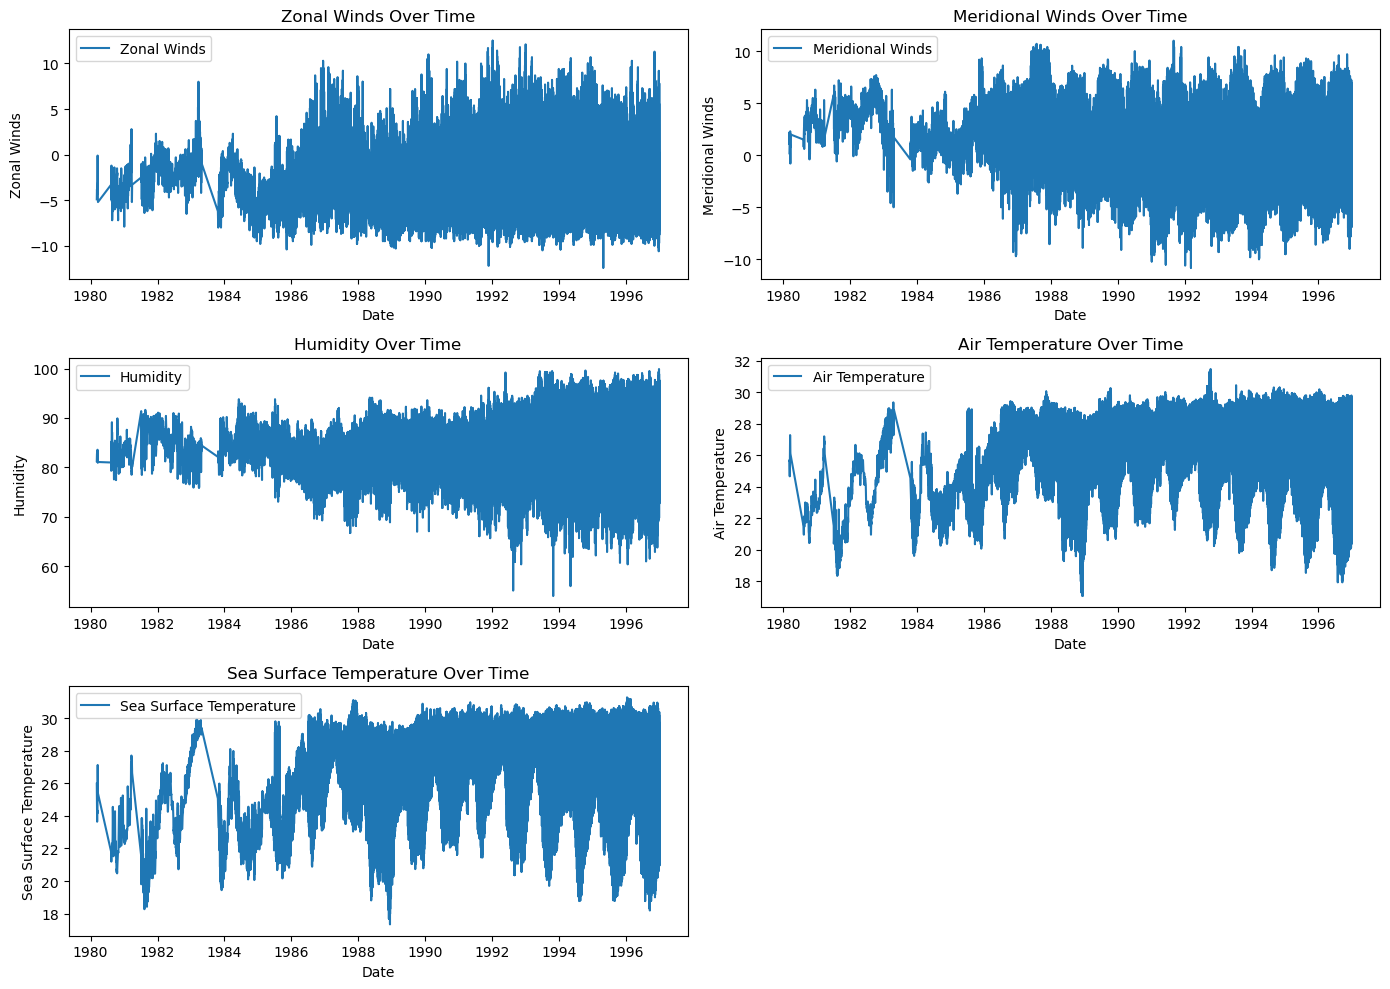

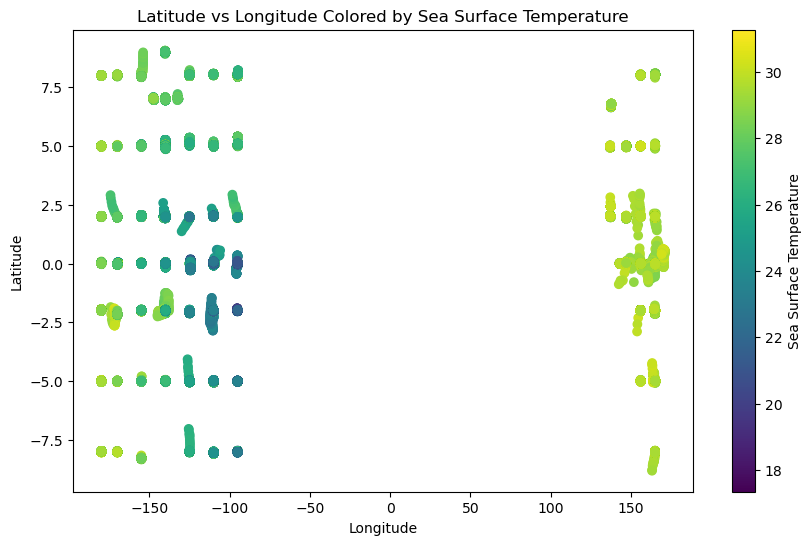

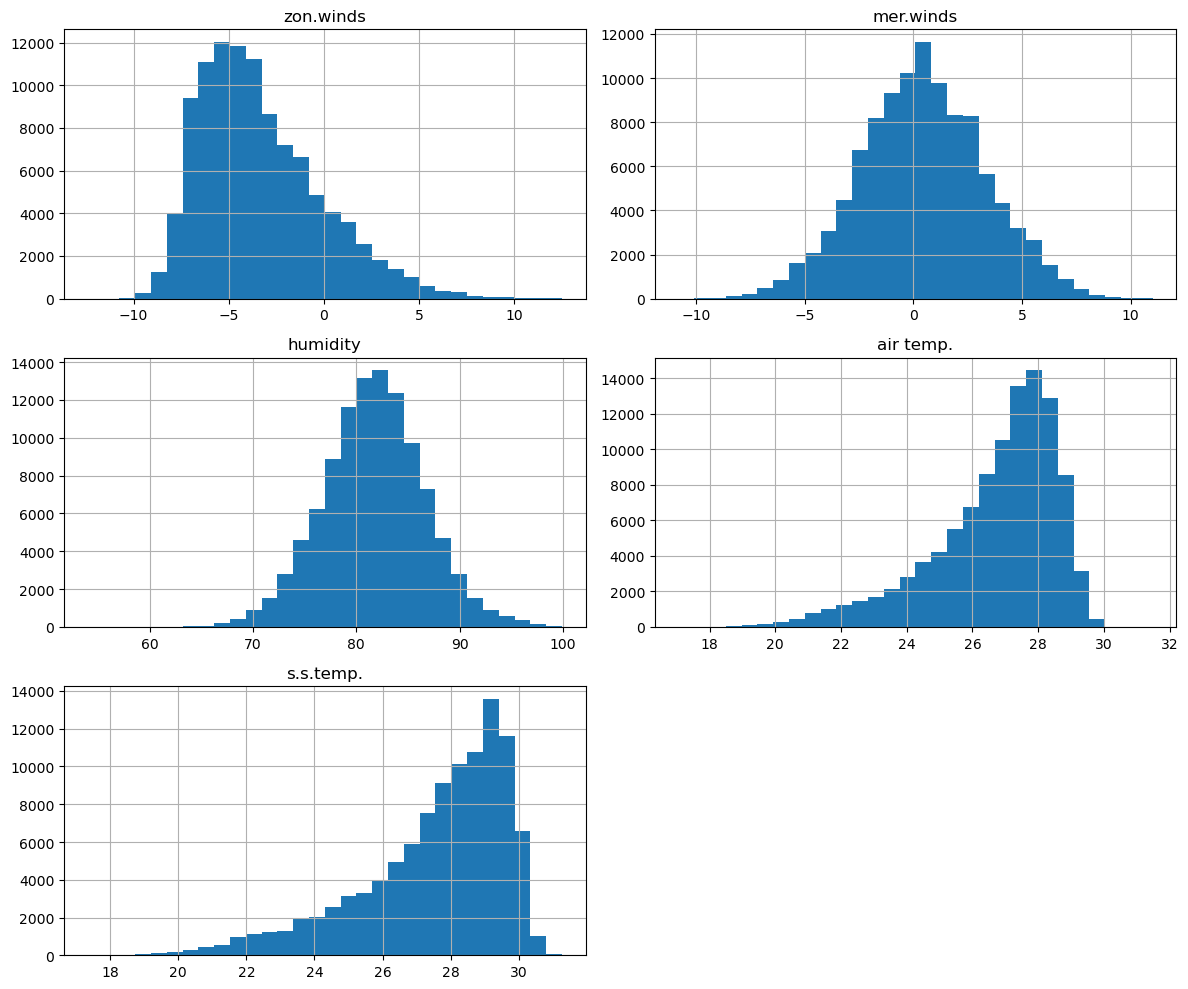

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your processed data
df = df_imputed

# Create time series plots
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(df['date'], df['zon.winds'], label='Zonal Winds')
plt.xlabel('Date')
plt.ylabel('Zonal Winds')
plt.title('Zonal Winds Over Time')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(df['date'], df['mer.winds'], label='Meridional Winds')
plt.xlabel('Date')
plt.ylabel('Meridional Winds')
plt.title('Meridional Winds Over Time')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(df['date'], df['humidity'], label='Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity Over Time')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(df['date'], df['air temp.'], label='Air Temperature')
plt.xlabel('Date')
plt.ylabel('Air Temperature')
plt.title('Air Temperature Over Time')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(df['date'], df['s.s.temp.'], label='Sea Surface Temperature')
plt.xlabel('Date')
plt.ylabel('Sea Surface Temperature')
plt.title('Sea Surface Temperature Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Create scatter plot for latitude vs longitude colored by sea surface temperature
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['s.s.temp.'], cmap='viridis')
plt.colorbar(scatter, label='Sea Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude Colored by Sea Surface Temperature')
plt.show()

# Create histograms for each variable
variables = ['zon.winds', 'mer.winds', 'humidity', 'air temp.', 's.s.temp.']
df[variables].hist(bins=30, figsize=(12, 10), layout=(3, 2))
plt.tight_layout()
plt.show()


Plotting correlation plot again to check if there is any differnece in the correlation after filling the null values

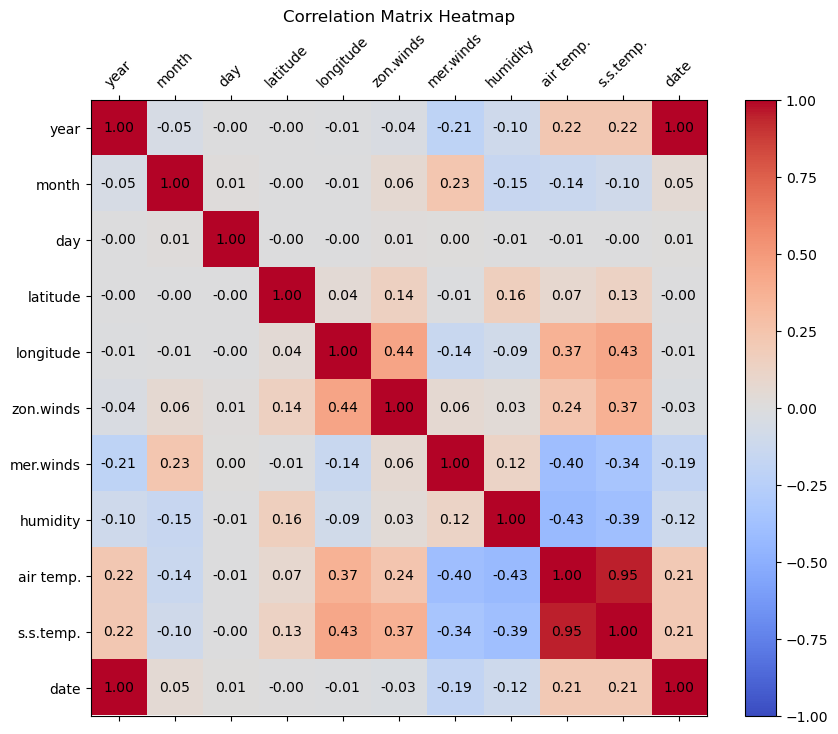

In [59]:
df=df_imputed
corr=df.corr()
import matplotlib.pyplot as plt
import numpy as np
# Create a heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

# Set axis labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# Set title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

Model training and data set splitting

In [60]:
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier

# Assuming df_imputed contains your features and target variable
X = df_imputed.drop(columns=['s.s.temp.','date'])  # Features
y = df_imputed['s.s.temp.']  # Target variable

# Split data into train and test sets
# Make sure to split before scaling to avoid data leakage
# Use scaled data if you have already scaled your features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Example parameters, adjust as needed

# Train the model on unscaled data
rf_model.fit(X_train, y_train)

# Make predictions on unscaled test data
predictions = rf_model.predict(X_test)


To print the predictions made by the model

In [61]:
predictions

array([23.9214, 27.1152, 25.1701, ..., 24.4246, 29.4381, 28.5917])

Checking the accuracy of the model

Mean Absolute Error: 0.11533108970644577
Mean Squared Error: 0.11533108970644577
R2 Score: 0.9754904422314001


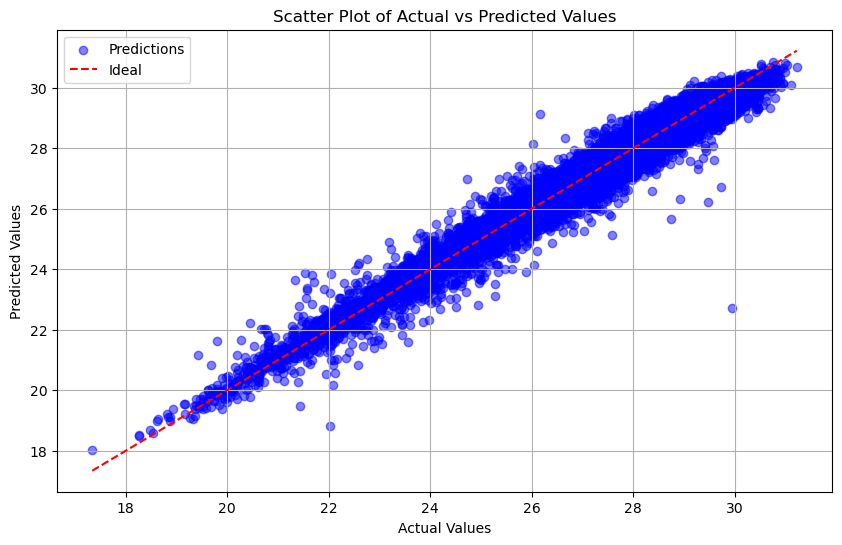

In [62]:
y_pred=predictions
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# Calculate and print the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mse}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Scatter plot of the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions", color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

Working on data given for test

In [63]:
testdata1.isnull().sum()

Unnamed: 0       0
year             0
month            0
day              0
latitude         0
longitude        0
zon.winds     3683
mer.winds     3683
humidity      9738
air temp.     2047
date             0
dtype: int64

In [64]:
testdata2.isnull().sum()

Index           0
year            0
month           0
day             0
latitude        0
longitude       0
zon.winds    4897
mer.winds    4897
humidity     4878
air temp.    2803
date            0
dtype: int64

In [65]:
testdata2_sorted.info()
testdata1_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32314 entries, 0 to 30723
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Index      32314 non-null  int64         
 1   year       32314 non-null  int64         
 2   month      32314 non-null  int64         
 3   day        32314 non-null  int64         
 4   latitude   32314 non-null  float64       
 5   longitude  32314 non-null  float64       
 6   zon.winds  27417 non-null  float64       
 7   mer.winds  27417 non-null  float64       
 8   humidity   27436 non-null  float64       
 9   air temp.  29511 non-null  float64       
 10  date       32314 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 3.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 26103 entries, 4951 to 24078
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed:

Sorting and analysing the test dataset

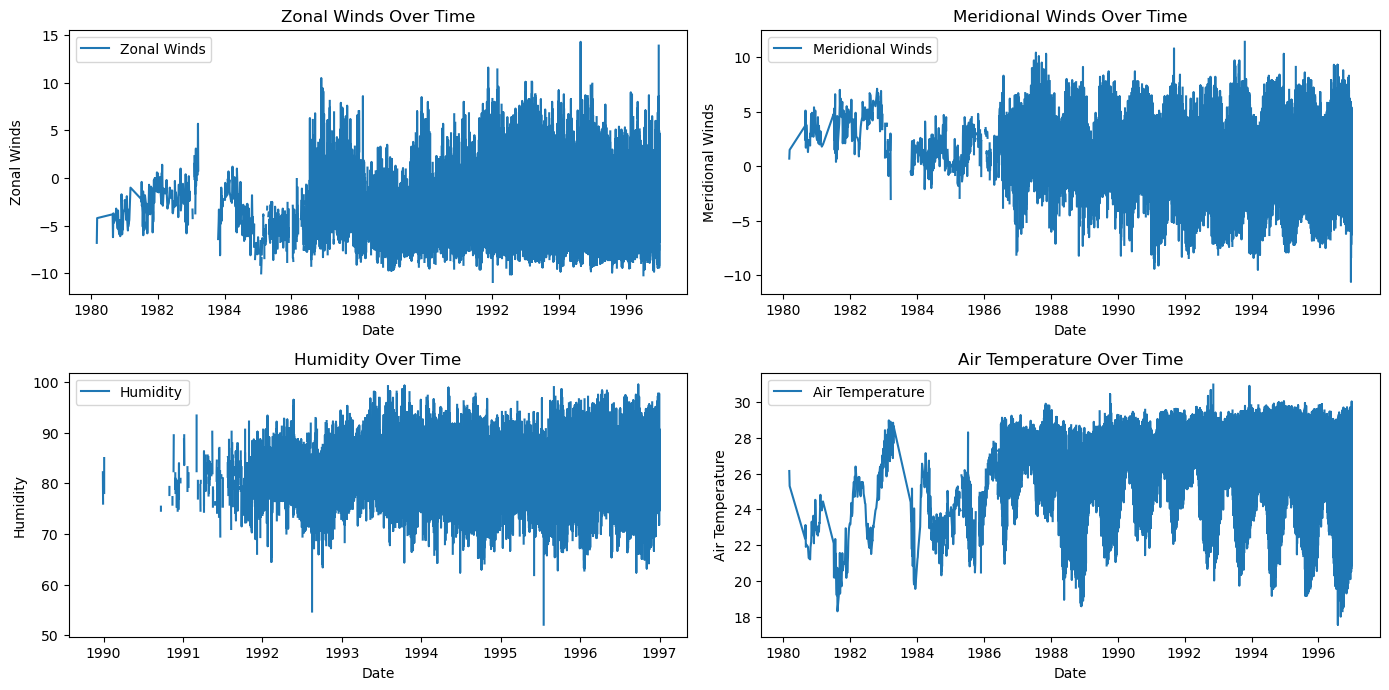

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6160\101782754.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(df['longitude'], df['latitude'], cmap='viridis')


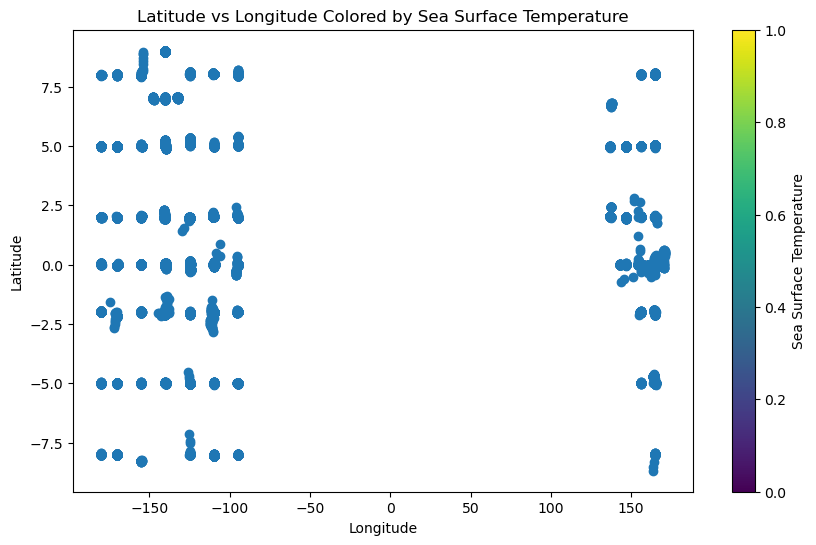

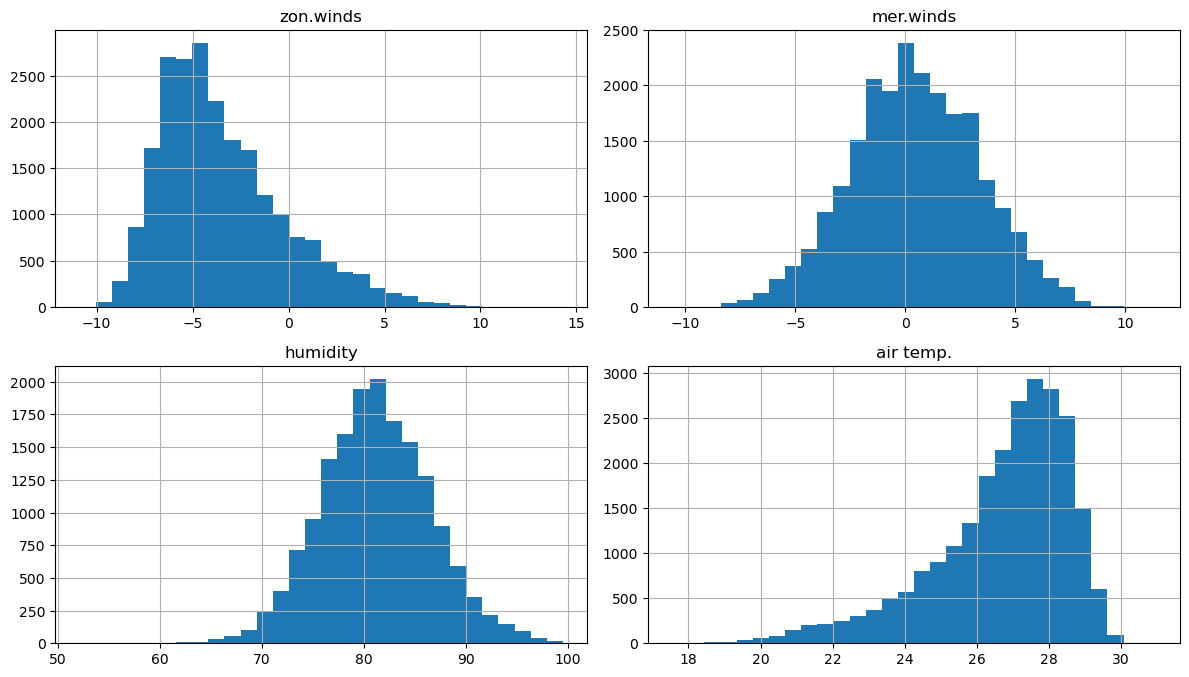

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your processed data
df = testdata1_sorted

# Create time series plots
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(df['date'], df['zon.winds'], label='Zonal Winds')
plt.xlabel('Date')
plt.ylabel('Zonal Winds')
plt.title('Zonal Winds Over Time')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(df['date'], df['mer.winds'], label='Meridional Winds')
plt.xlabel('Date')
plt.ylabel('Meridional Winds')
plt.title('Meridional Winds Over Time')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(df['date'], df['humidity'], label='Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity Over Time')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(df['date'], df['air temp.'], label='Air Temperature')
plt.xlabel('Date')
plt.ylabel('Air Temperature')
plt.title('Air Temperature Over Time')
plt.legend()


plt.tight_layout()
plt.show()

# Create scatter plot for latitude vs longitude colored by sea surface temperature
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], cmap='viridis')
plt.colorbar(scatter, label='Sea Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude Colored by Sea Surface Temperature')
plt.show()

# Create histograms for each variable
variables = ['zon.winds', 'mer.winds', 'humidity', 'air temp.']
df[variables].hist(bins=30, figsize=(12, 10), layout=(3, 2))
plt.tight_layout()
plt.show()


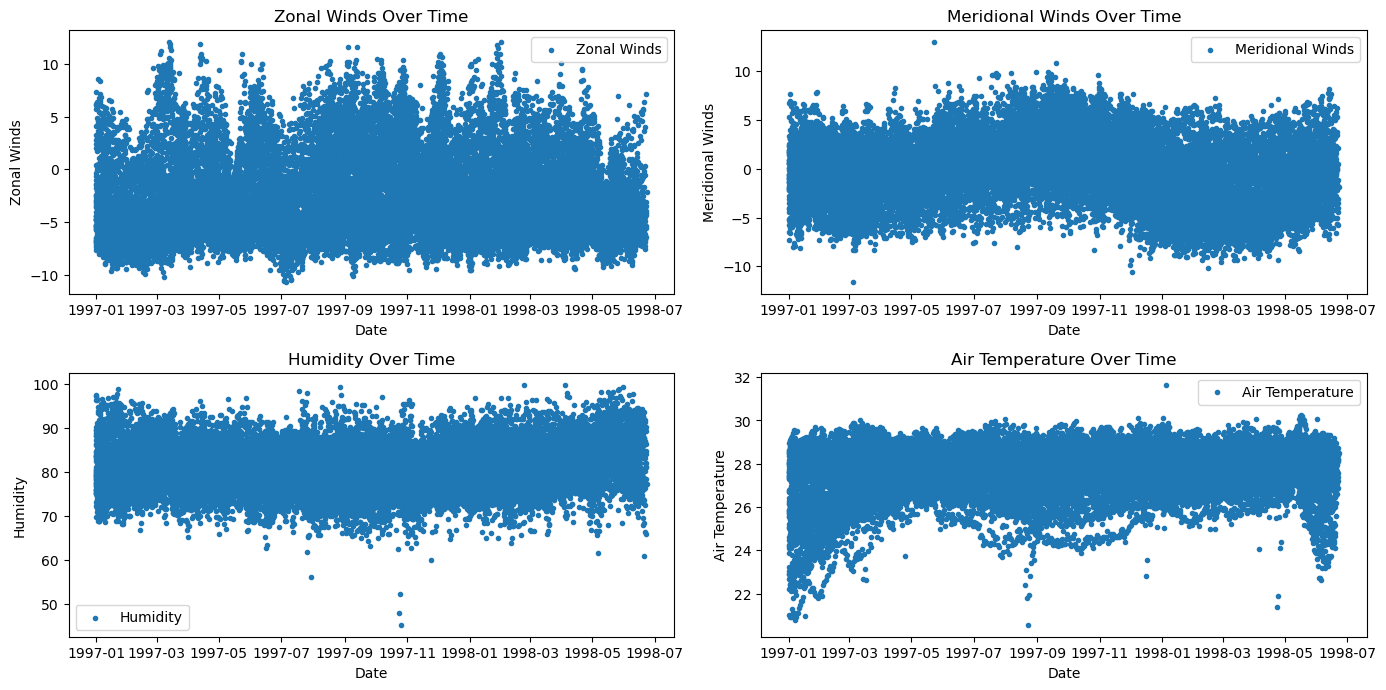

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6160\4272988730.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(df['longitude'], df['latitude'],cmap='viridis', marker='.')


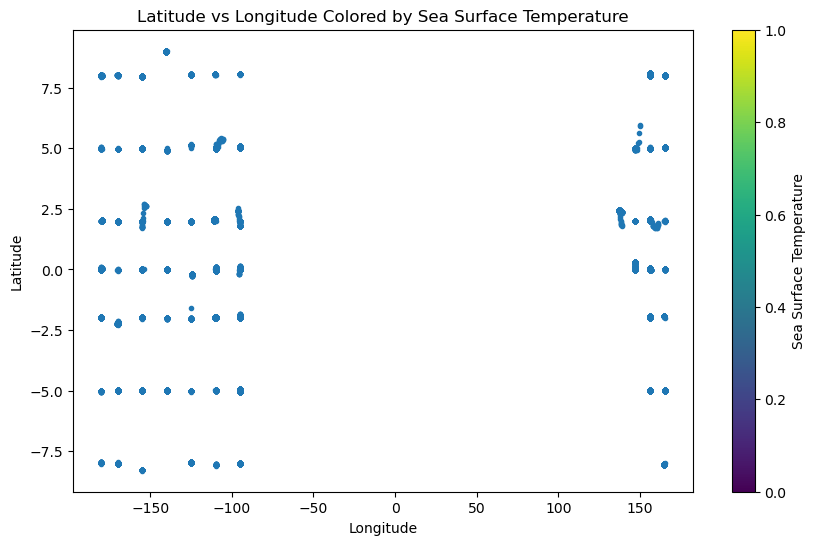

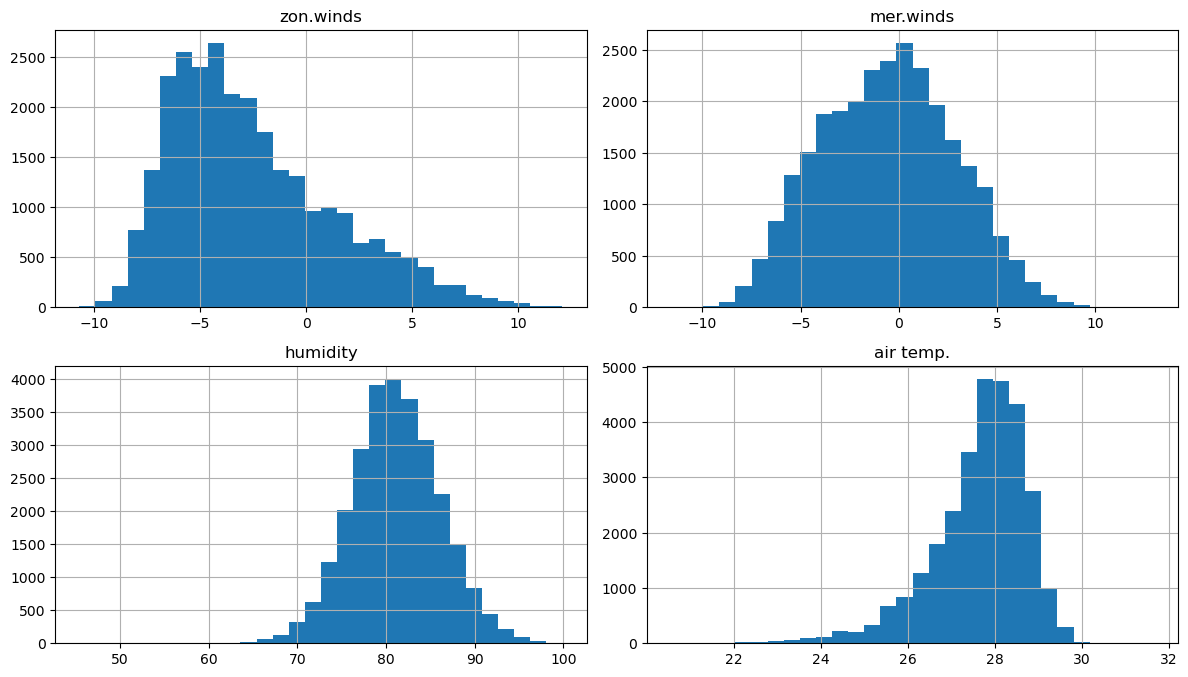

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your processed data
df = testdata2_sorted

# Create scatter plots for time series data
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.scatter(df['date'], df['zon.winds'], label='Zonal Winds', marker='.')
plt.xlabel('Date')
plt.ylabel('Zonal Winds')
plt.title('Zonal Winds Over Time')
plt.legend()

plt.subplot(3, 2, 2)
plt.scatter(df['date'], df['mer.winds'], label='Meridional Winds', marker='.')
plt.xlabel('Date')
plt.ylabel('Meridional Winds')
plt.title('Meridional Winds Over Time')
plt.legend()

plt.subplot(3, 2, 3)
plt.scatter(df['date'], df['humidity'], label='Humidity', marker='.')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity Over Time')
plt.legend()

plt.subplot(3, 2, 4)
plt.scatter(df['date'], df['air temp.'], label='Air Temperature', marker='.')
plt.xlabel('Date')
plt.ylabel('Air Temperature')
plt.title('Air Temperature Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Create scatter plot for latitude vs longitude colored by sea surface temperature
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'],cmap='viridis', marker='.')
plt.colorbar(scatter, label='Sea Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude Colored by Sea Surface Temperature')
plt.show()

# Create histograms for each variable
variables = ['zon.winds', 'mer.winds', 'humidity', 'air temp.']
df[variables].hist(bins=30, figsize=(12, 10), layout=(3, 2))
plt.tight_layout()
plt.show()


Analysing the given dataset

In [68]:
df1 = testdata1_sorted
df2 = testdata2_sorted

if 'Unnamed: 0' in df1.columns:
    df1 = df1.drop('Unnamed: 0', axis=1)

print(df1.columns)
print(df2.columns)

print("First DataFrame:")
print(df1.head())

print("\nSecond DataFrame:")
print(df2.head())

Index(['year', 'month', 'day', 'latitude', 'longitude', 'zon.winds',
       'mer.winds', 'humidity', 'air temp.', 'date'],
      dtype='object')
Index(['Index', 'year', 'month', 'day', 'latitude', 'longitude', 'zon.winds',
       'mer.winds', 'humidity', 'air temp.', 'date'],
      dtype='object')
First DataFrame:
       year  month  day  latitude  longitude  zon.winds  mer.winds  humidity  \
4951   1980      3    7     -0.02    -109.44       -6.8        0.7       NaN   
16738  1980      3   11     -0.02    -109.44       -4.2        1.5       NaN   
10752  1980      8   27      0.00    -109.56       -3.8        3.7       NaN   
5289   1980      8   29      0.00    -109.56       -5.0        2.4       NaN   
2392   1980      8   31      0.00    -109.56       -6.2        5.1       NaN   

       air temp.       date  
4951       26.14 1980-03-07  
16738      25.30 1980-03-11  
10752      22.36 1980-08-27  
5289       22.45 1980-08-29  
2392       23.12 1980-08-31  

Second DataFrame:
    

Merging the testdataset

In [69]:


# Merge the DataFrames
merged_df = pd.concat([df1, df2])

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)  # Replace 'merged_file.csv' with your desired output file name



In [70]:
dx = pd.read_csv('merged_file.csv')

In [71]:
dx.shape

(58417, 11)

In [72]:
if 'Index' in df1.columns:
    df1 = df1.drop('Index', axis=1)

Checking for the null values in the test dataset

In [73]:
dx.isnull().sum()

year             0
month            0
day              0
latitude         0
longitude        0
zon.winds     8580
mer.winds     8580
humidity     14616
air temp.     4850
date             0
Index        26103
dtype: int64

Arrranging the merged dataset according to date and filling the null values 

In [74]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
df=dx

# Assuming your DataFrame is named 'df'
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Drop the 'date' column for imputation and store it separately
date_col = df['date']
df = df.drop(columns=['date'])

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Apply the imputer to the DataFrame
imputed_data = imputer.fit_transform(df)

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=df.columns, index=df.index)

# Add the 'date' column back to the imputed DataFrame
df_imputed['date'] = date_col

# Ensure the 'date' column is the same dtype as original
df_imputed['date'] = pd.to_datetime(df_imputed['date'])

# If there were integer columns, convert them back to integers
for column in ['year', 'month', 'day']:
    df_imputed[column] = df_imputed[column].astype(int)

print(df_imputed.isnull().sum())  # Check if there are any remaining null values


year         0
month        0
day          0
latitude     0
longitude    0
zon.winds    0
mer.winds    0
humidity     0
air temp.    0
Index        0
date         0
dtype: int64


Making predictions on the test dataset

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

feature_columns = [
    "year",
    "month",
    "day",
    "latitude",
    "longitude",
    "zon.winds",
    "mer.winds",
    "humidity",
    "air temp."
]

X = df_imputed[feature_columns]

# Make predictions on the test set
y_preds = rf_model.predict(X)

y_preds

array([26.138 , 25.3282, 22.6545, ..., 28.2304, 29.2369, 29.3658])

In [76]:
y_preds.shape

(58417,)

Storing the predictions in a file

In [77]:
import pandas as pd

# Assuming X is your original DataFrame and predictions is a NumPy array containing predictions

# Convert predictions array to a DataFrame
predictions_df = pd.DataFrame(y_preds, columns=['predictions'])

# Concatenate X and predictions along columns
X_with_predictions = pd.concat([X, predictions_df], axis=1)

# Save the combined DataFrame to a new CSV file
X_with_predictions.to_csv('predictions.csv', index=False)

Plotting the trend of average temperature as given in the train dataset and predictions that were made by the model on the test dataset

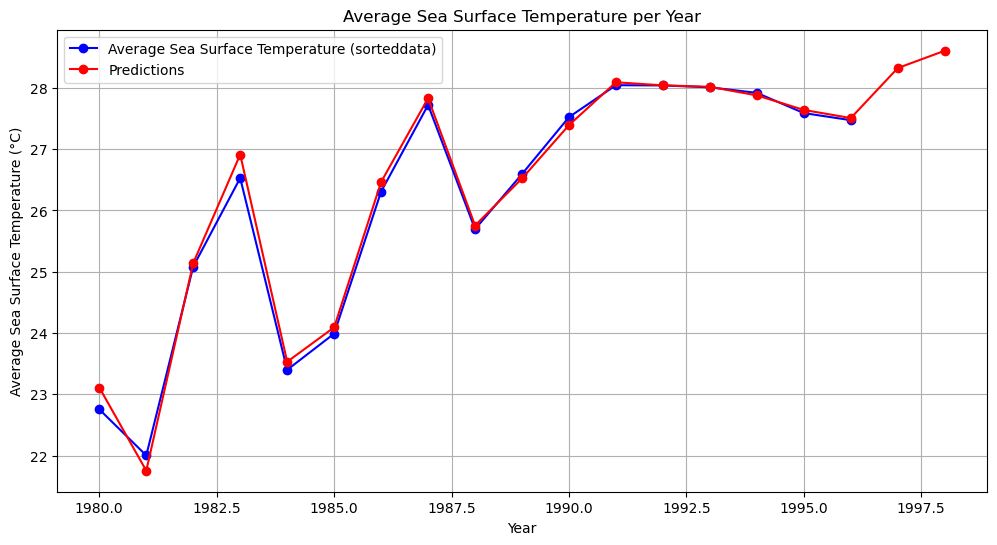

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Load sorteddata
sorteddata = pd.read_csv('sorted_data.csv')  # Adjust the file path as needed

# Assuming X is your original DataFrame and predictions is a NumPy array containing predictions

# Convert predictions array to a DataFrame
predictions_df = pd.DataFrame(y_preds, columns=['predictions'])
# Concatenate X and predictions along columns
X_with_predictions = pd.concat([X, predictions_df], axis=1)

# Create a new 'date' column based on 'year', 'month', and 'day'
X_with_predictions['date'] = pd.to_datetime(X_with_predictions[['year', 'month', 'day']])

# Combine sorteddata with X_with_predictions
combined_data = pd.concat([sorteddata, X_with_predictions], ignore_index=True)

# Convert the 'date' column to datetime
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Extract the year from the date column
combined_data['year'] = combined_data['date'].dt.year

# Group by year and calculate the mean sea surface temperature
avg_ss_temp_per_year_sorteddata = sorteddata.groupby('year')['s.s.temp.'].mean()
avg_ss_temp_per_year_predictions = X_with_predictions.groupby('year')['predictions'].mean()

# Plotting average sea surface temperature per year
plt.figure(figsize=(12, 6))
avg_ss_temp_per_year_sorteddata.plot(kind='line', marker='o', color='b', label='Average Sea Surface Temperature (sorteddata)')
avg_ss_temp_per_year_predictions.plot(kind='line', marker='o', color='r', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Average Sea Surface Temperature (°C)')
plt.title('Average Sea Surface Temperature per Year')
plt.legend()
plt.grid(True)
plt.show()